# Test of code_heatmaps


## Import modules

In [78]:
# kwargs and parameters
try:
    import import_notebook
except ModuleNotFoundError:
    pass

import pandas as pd
import numpy as np
try:
    from mutagenesis_visualization.main.scripts.code_heatmaps import (
        _hierarchical_sort, _helix, _labels, _sheet, _loop, plot_heatmap, plot_heatmap_rows, plot_heatmap_columns
    ) 
   # from mutagenesis_visualization.main.scripts.code_createobjects import(hras_RBD)
except ModuleNotFoundError:
    import import_notebook
    import os
    directory = os.getcwd()
    new_directory = directory.replace('tests', 'main')
    os.chdir(new_directory)
    from code_heatmaps import (
        _hierarchical_sort, _helix, _labels, _sheet, _loop, plot_heatmap, plot_heatmap_rows, plot_heatmap_columns
    )
   # from code_createobjects import (hras_RBD)
    os.chdir(directory)
    
try:
    from mutagenesis_visualization.main.scripts.code_class import Screen
    
except ModuleNotFoundError:
    import import_notebook
    from code_class import Screen
    

In [59]:
directory
new_directory

'/Users/joannewang/Documents/joanneURAP/mutagenesis_visualization/mutagenesis_visualization/main/notebooks'

In [61]:
print(os.chdir("../data"))

None


In [63]:
print(os.path.abspath(os.curdir))

/Users/joannewang/Documents/joanneURAP/mutagenesis_visualization/mutagenesis_visualization


## Test main functions

In [79]:
def hras_RBD():
    '''Create object hras_RBD'''
    # Use relative file import to access the data folder
    try:
        location = os.path.dirname(os.path.realpath(__file__))
        my_file = os.path.join(location, '/data', 'HRas166_RBD.csv')
    except NameError:
        my_file = os.path.join('/Users/joannewang/Documents/joanneURAP/mutagenesis_visualization/mutagenesis_visualization/data', 'HRas166_RBD.csv')
   
    # Load enrichment scores
    hras_enrichment_RBD = np.genfromtxt(my_file, delimiter=',')

    # Define protein sequence
    hras_sequence = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPG'

    # Define secondary structure
    secondary = [['L0'], ['β1'] * (9 - 1), ['L1'] * (15 - 9),
                 ['α1'] * (25 - 15), ['L2'] * (36 - 25), ['β2'] * (46 - 36),
                 ['L3'] * (48 - 46), ['β3'] * (58 - 48), ['L4'] * (64 - 58),
                 ['α2'] * (74 - 64), ['L5'] * (76 - 74), ['β4'] * (83 - 76),
                 ['L6'] * (86 - 83), ['α3'] * (103 - 86), ['L7'] * (110 - 103),
                 ['β5'] * (116 - 110), ['L8'] * (126 - 116),
                 ['α4'] * (137 - 126), ['L9'] * (140 - 137),
                 ['β6'] * (143 - 140), ['L10'] * (151 - 143),
                 ['α5'] * (172 - 151), ['L11'] * (190 - 172)]

    # Create object
    hras_RBD = Screen(
        dataset=hras_enrichment_RBD,
        sequence=hras_sequence,
        secondary=secondary
    )
    return hras_RBD

In [80]:
hras_RBD = hras_RBD()

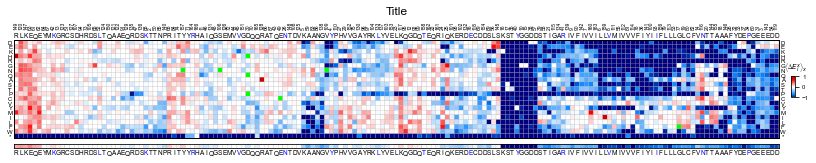

NoneType

In [85]:
hras_RBD.heatmap(hierarchical = True)

In [122]:
def test_plot_heatmap():
    def test_plot_heatmap_output():
        try: 
            hras_RBD.heatmap
        except: 
            error = True
            return error
        
    assert (test_plot_heatmap_output() == hras_RBD.heatmap), "function plot_heatmap failed"
    

SyntaxError: invalid syntax (<ipython-input-125-3daf3035f7f2>, line 1)

In [123]:
print(test_plot_heatmap_output())

None


In [121]:
test_plot_heatmap()

AssertionError: function plot_heatmap failed

In [ ]:
def test_plot_heatmap_rows():
    

In [114]:
hras_RBD.heatmap_rows(selection=['E', 'Q', 'A', 'P', 'V', 'Y']
)

SyntaxError: invalid syntax (<ipython-input-114-c045ee35268e>, line 1)

## Test aux functions

In [2]:
def test_hierarchical_sort():
    df = pd.DataFrame([[1, 7, 6, 2], [0, 0, 0, 0], [10, 10, 10, 10],
                       [1, 1, 1, 1]])
    result = _hierarchical_sort(df.T)
    assert (result == [2, 0, 1, 3]).all(), 'columns are not properly sorted out'

In [3]:
def test_helix():
    '''testing function produces matplotlib object'''
    assert (
        str(type(_helix(0, 5))) == "<class 'matplotlib.patches.Rectangle'>"
    ), "function _helix failed"

In [4]:
def test_labels():
    """testing function produces tuple"""
    assert (
        str(type(_labels(1)))
    ) == "<class 'tuple'>", "function _labels failed"

In [52]:
def test_sheet():
    """testing function prouduces matplotlib object"""
    assert (
        str(type(_sheet(1, 5)))
    ) == "<class 'matplotlib.patches.FancyArrow'>", "function _sheet failed"

In [6]:
def test_loop():
    '''testing function produces matplotlib object'''
    assert (
        str(type(_loop(1, 5)))
    ) == "<class 'matplotlib.patches.Rectangle'>", "function _loop failed"